In [19]:
import os
from skimage import io
from PIL import Image

import matplotlib.pyplot as plt
%matplotlib notebook

from ipywidgets import interactive
from IPython.core.display import HTML
from IPython.display import display

from ipywidgets import widgets

import numpy as np
import glob

from tqdm import tqdm

from pystackreg import StackReg
from datetime import datetime


# testing with 2 images 

In [7]:
image1_filename = "/Users/j35/HFIR/CG1D/IPTS-30750/23_06_09_left/charge_0120_1187.tiff"
assert os.path.exists(image1_filename)

image2_filename = "/Users/j35/HFIR/CG1D/IPTS-30750/23_06_09_left/charge_0120_1725.tiff"
assert os.path.exists(image2_filename)

In [9]:
ref = io.imread(image1_filename)
mov = io.imread(image2_filename)

<IPython.core.display.Javascript object>


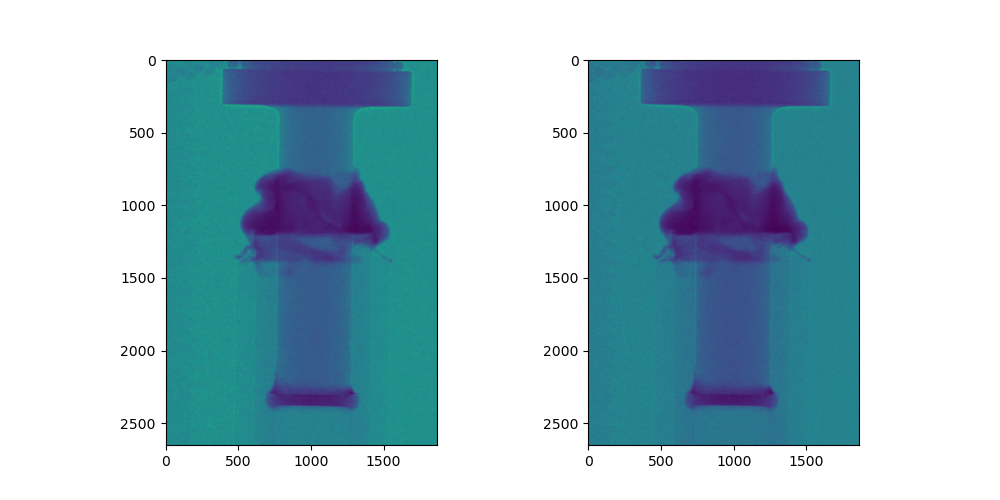

In [31]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10,5))
ax[0].imshow(ref)
ax[1].imshow(mov)

# just to show that there is a horizontal displacement 

<IPython.core.display.Javascript object>


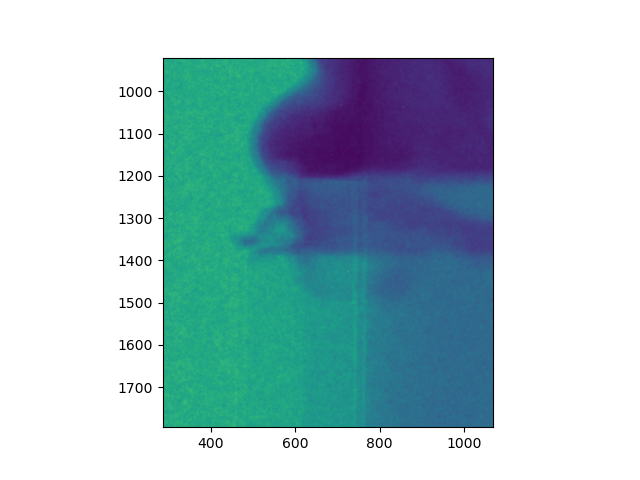

interactive(children=(FloatSlider(value=0.0, description='coeff', max=1.0), Output()), _dom_classes=('widget-i…

In [20]:
fig, ax = plt.subplots(num="combine")

def plot_combine(coeff):
    
    combine_image = ref + coeff * mov
    ax.imshow(combine_image)

    
plot_combine_ui = interactive(plot_combine,
                             coeff = widgets.FloatSlider(min=0, max=1, value=0))
display(plot_combine_ui)
    

# testing the displacement with a profile

In [22]:
roi = {'x0': 1130, 'x1': 1500, 'y0': 550, 'y1': 555}

<IPython.core.display.Javascript object>


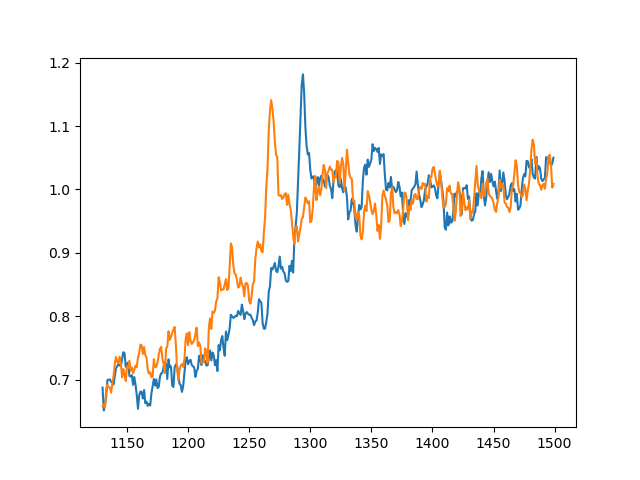

In [30]:
region_image1 = ref[roi['y0']: roi['y1'], roi['x0']: roi['x1']]
profile_region_image1 = np.mean(region_image1, axis=0)

xaxis = np.arange(roi['x0'], roi['x1'])

region_image2 = mov[roi['y0']: roi['y1'], roi['x0']: roi['x1']]
profile_region_image2 = np.mean(region_image2, axis=0)

fig, ax = plt.subplots(num="profiles")
ax.plot(xaxis, profile_region_image1, label='reference')
ax.plot(xaxis, profile_region_image2, label='mov')



# translation transformation

In [34]:
sr = StackReg(StackReg.TRANSLATION)
out_tra = sr.register_transform(ref, mov)

<IPython.core.display.Javascript object>


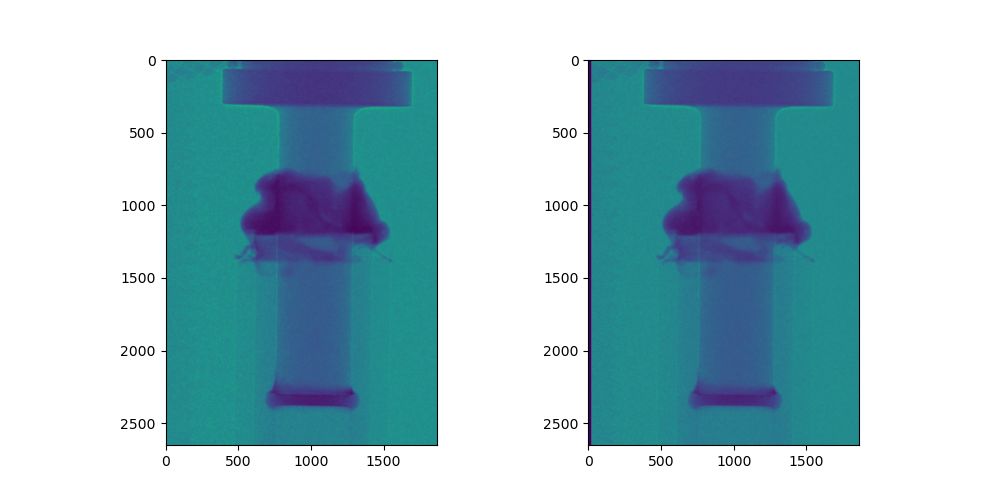

In [36]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10,5), num="translation transformation")
ax[0].imshow(ref)
ax[1].imshow(out_tra)

<IPython.core.display.Javascript object>


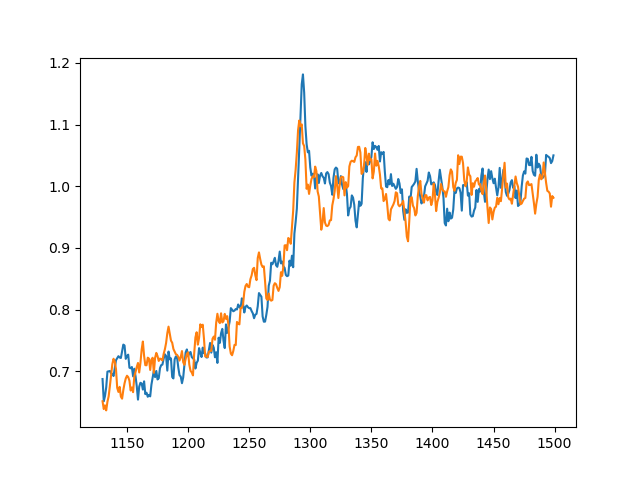

In [37]:
region_image1 = ref[roi['y0']: roi['y1'], roi['x0']: roi['x1']]
profile_region_image1 = np.mean(region_image1, axis=0)

xaxis = np.arange(roi['x0'], roi['x1'])

region_image2_tran_transfor = out_tra[roi['y0']: roi['y1'], roi['x0']: roi['x1']]
profile_region_image2_tran_transform = np.mean(region_image2_tran_transfor, axis=0)

fig, ax = plt.subplots(num="profiles after translation transformation")
ax.plot(xaxis, profile_region_image1, label='reference')
ax.plot(xaxis, profile_region_image2_tran_transform, label='mov')


# rigit body transformation 

In [38]:
sr = StackReg(StackReg.RIGID_BODY)
out_rot = sr.register_transform(ref, mov)

<IPython.core.display.Javascript object>


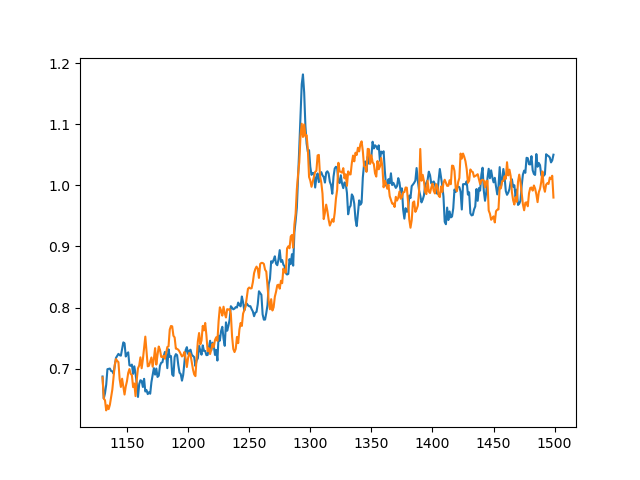

In [39]:
region_image1 = ref[roi['y0']: roi['y1'], roi['x0']: roi['x1']]
profile_region_image1 = np.mean(region_image1, axis=0)

xaxis = np.arange(roi['x0'], roi['x1'])

region_image2_tran_transfor = out_rot[roi['y0']: roi['y1'], roi['x0']: roi['x1']]
profile_region_image2_tran_transform = np.mean(region_image2_tran_transfor, axis=0)

fig, ax = plt.subplots(num="profiles after rigit body transformation")
ax.plot(xaxis, profile_region_image1, label='reference')
ax.plot(xaxis, profile_region_image2_tran_transform, label='mov')

# trying over a larger subset 

In [5]:
# nbr_images_to_process = 10

In [34]:
list_images_filename = glob.glob(os.path.join('/Users/j35/HFIR/CG1D/IPTS-30750/subset_registered_first_of_23_06_09_left/', '*.tiff'))
assert len(list_images_filename) > 0

In [35]:
# list_images_filename = list_images_filename[0:nbr_images_to_process]

In [36]:
list_images = []
for index in tqdm(range(len(list_images_filename))):
    _file = list_images_filename[index]
    list_images.append(io.imread(_file))

100%|███████████████████████████████████████████████████████████████████| 11/11 [00:00<00:00, 301.35it/s]


In [37]:
list_images_3d_array = np.asarray(list_images)

### use first image as a reference 

In [38]:
start = datetime.now()
sr = StackReg(StackReg.RIGID_BODY)
out_first = sr.register_transform_stack(list_images_3d_array, reference='first')
end = datetime.now()

print(f"It took {end-start}s to process {nbr_images_to_process}!")

It took 0:00:45.391328s to process 10!


#### testing time
 
 * 37s for 10 images
 * 33s for 10 images
 * 46s for 11 images

In [39]:
output_folder = "/Users/j35/HFIR/CG1D/IPTS-30750/subset_registered_again_first_of_23_06_09_left/"
for _index, filename in enumerate(list_images_filename):
    base_name = os.path.basename(filename)
    output_filename = os.path.join(output_folder, base_name)
    im = Image.fromarray(out_first[_index])
    im.save(output_filename)
    #     io.imsave(output_filename, out_first[_index])

### use previous image as a reference 

In [30]:
start = datetime.now()
sr = StackReg(StackReg.RIGID_BODY)
out_first = sr.register_transform_stack(list_images_3d_array, reference='previous')
end = datetime.now()

print(f"It took {end-start}s to process {nbr_images_to_process}!")

It took 0:00:44.534966s to process 10!


#### testing time

 * 44s for 10 images

In [31]:
output_folder = "/Users/j35/HFIR/CG1D/IPTS-30750/subset_registered_previous_of_23_06_09_left/"
for _index, filename in enumerate(list_images_filename):
    base_name = os.path.basename(filename)
    output_filename = os.path.join(output_folder, base_name)
    im = Image.fromarray(out_first[_index])
    im.save(output_filename)
    #     io.imsave(output_filename, out_first[_index])


### use **mean** as a reference

In [32]:
start = datetime.now()
sr = StackReg(StackReg.RIGID_BODY)
out_first = sr.register_transform_stack(list_images_3d_array, reference='mean')
end = datetime.now()

print(f"It took {end-start}s to process {nbr_images_to_process}!")

It took 0:00:53.423570s to process 10!


#### testing time

 * 53s to process 10

In [33]:
output_folder = "/Users/j35/HFIR/CG1D/IPTS-30750/subset_registered_mean_of_23_06_09_left/"
for _index, filename in enumerate(list_images_filename):
    base_name = os.path.basename(filename)
    output_filename = os.path.join(output_folder, base_name)
    im = Image.fromarray(out_first[_index])
    im.save(output_filename)
    #     io.imsave(output_filename, out_first[_index])

**Results:**

 * using **previous** doest not work great !
 * using **first** works the best so far !
 * using **mean** doest not work great !
 
 Let's try to use first a second time !

In [ ]:
# checking results

In [ ]:
# fig, ax = plt.subplots(num="stack registration rigid body")

# def plot_combine_check(ref_index):

#     data = out_first[ref_index]
#     region_data = data[roi['y0']: roi['y1'], roi['x0']: roi['x1']]
#     profile = np.mean(region_data, axis=0)

#     ax.plot(xaxis, profile_region_image1, label='reference')
#     ax.plot(xaxis, profile, label=f"index #{ref_index}")

    
# plot_combine_check_ui = interactive(plot_combine_check,
#                                     ref_index = widgets.IntSlider(min=0, 
#                                                                   max=len(list_images), 
#                                                                   value=0))
# display(plot_combine_check_ui)

## let's export the registered data 